# 2018-04-17 Econ 101b Problem Set 12: Monetary Policy Reaction Function

### Problem set will be due M Apr 30 at midnight...

#### Sections between Tu AM & Th AM lecture will be problem set section...

## Setting up the Python/Jupyter environment

In [2]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [3]:
# ABOVE CELL IS "NO SCROLLING SUBWINDOWS" SETUP
#
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [4]:
# LOADING LIBRARIES WE MIGHT NEED...
#
# system

import sys
import os
from urllib.request import urlretrieve

In [5]:
# LOADING LIBRARIES WE MIGHT NEED...
#
# plotting

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

In [6]:
# LOADING LIBRARIES WE MIGHT NEED...
#
# data handling

import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime

In [7]:
# LOADING LIBRARIES WE MIGHT NEED...
#
# math

import scipy as sp
import numpy as np
import math
import random

In [8]:
# LOADING LIBRARIES WE MIGHT NEED...
#
# statistics

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/delong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
# PRETTIER GRAPHICS SETUP
#
# graphics setup: seaborn-whitegrid and figure size;
# graphs in the notebook itself...

%matplotlib inline 

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 10
plt.rcParams["figure.figsize"] = figure_size

In [10]:
# THIS CELL IS THE KEY TO THE OKPY.ORG AUTOGRADER SYSTEM
#
# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, but it won't ask you who you are because
# it remembers you. However, you will need to log in once per assignment.

!pip install -U okpy

from client.api.notebook import Notebook

ok = Notebook('ps12.ok')
_ = ok.auth(force=True, inline=True)

Requirement already up-to-date: okpy in /Users/delong/anaconda3/lib/python3.6/site-packages
Requirement already up-to-date: requests==2.12.4 in /Users/delong/anaconda3/lib/python3.6/site-packages (from okpy)
Requirement already up-to-date: coverage==3.7.1 in /Users/delong/anaconda3/lib/python3.6/site-packages (from okpy)
You are using pip version 9.0.2, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Assignment: PS12 Notebook
OK, version v1.13.11


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: goEPSjqnLuEH1CMZrvPlg1liXt4krc
Successfully logged in as jbdelong@berkeley.edu


### ⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎
### RUN THESE CELLS ABOVE FIRST

# Problem Set 12: Monetary Policy Reaction Function (Due M Apr 30 11:59:59 PM)

----

&nbsp;

## Introduction

The autograder, both in the tests you run along the way as you work on the problem set and in calculating the final score, looks in the same directory as the problem set notebook for an "ok.tests" directory, and then runs the tests in the "q\*\*.py" files in that directory (where "\*\*" denotes a two-digit number, possibly with a leading zero). Those tests take the form of comparing a variable that should be in your namespace and seeing if it is close to some desired value that we get when we do the problem set.

Thus while the problem set instructions ask you to run simulations and plot graphs, what you are tested on is whether the appropriate variables in your namespace have (close to the) right values. We do not care what code you use in order to get those variables to the right values. 

You can run simulations and then pick appropriate values out by slicing a series in order to get the right number. 

You can use your knowledge of the algebraic solution to the model to have Python calculate the answer, having first set the parameters to the right values, as in:

    s = 0.24 # (say)
    n = 0.01
    g = 0.02
    delta = 0.03
    Delta_n = -0.01
    KoverYinitial = s/(n+g+delta)
    KoverYalternative = s/(n+Delta_n+g+delta)
    
You can even do all of the calculations on pen and paper, and simply code up:

    KoverYinitial = 4
    KoverYalternative = 4.8
    
Perhaps we should ask you to do all three—start with simulations, or with algebraic equations with set parameter values, or with full pen-and-paper calculations with only the final results entered into the notebook—and then ask you to check your results from one mode by doing the other two. But: _ars longa, vita brevis_. Focus on what works _for you_: the key is to get a sense of how economists' center-of-gravity analyses of long-run growth work, so that when you encounter such an analysis later, outside the university, you have the right intellectual panoply to evaluate it.

----

&nbsp;

## Programming Dos and Don'ts...

### A Running List...

1. **Do** restart your kernel and run cells up to your current working point every fifteen minutes or so. Yes, it takes a little time. But if you don't, sooner or later the machine's namespace will get confused, and then you will get confused about the state of the machine's namespace, and by assuming things about it that are false you will lose hours and hours...   
&nbsp;

2. **Do** reload the page when restarting the kernel does not seem to do the job...   
&nbsp;

3. **Do** edit code cells by copying them below your current version and then working on the copy: when you break everything in the current cell (as you will), you can then go back to the old cell and start fresh...   
&nbsp;

4. **Do** exercise agile development practices: if there is a line of code that you have not tested, test it. The best way to test is to ask the machine to echo back to you the thing you have just created in its namespace to make sure that it is what you want it to be. Only after you are **certain** that your namespace contains what you think it does should you write the next line of code. And then you should immediately test it...   
&nbsp;

5. **Do** take screenshots of your error messages...   
&nbsp;

6. **Do** google your error messages: Ms. Google is your best friend here...   
&nbsp;

7. **Do not** confuse assignment ("=") and test for equality ("=="). In general, if there is an "if" anywhere nearby, you should be testing for equality. If there is not, you should be assignment a variable in your namespace to a value. **Do** curse the mathematicians 500 years ago who did not realize that in the twenty-first century it would be very convenient if we had different and not confusable symbols for equals-as-assignment and equals-as-test...   
&nbsp;

----

&nbsp;

**Thanks to**: Felix Deng, Rachel Grossberg, Christopher Hench, Meghana Krishnakumer, Seth Lloyd, Ronald Walker...

**(Task A) Programming Practices**

If it strikes you that anything should be added to this list of programming dos and don'ts, please email it to me at <delong@econ.berkeley.edu>

----

### The Baseline Sticky-Price Model

Start with the IS-Curve for the sticky-price model:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

Remember: causation moves from right to left: the components of spending add up to aggregate demand or total expenditure E, and the inventory adjustment process then drives national income and product Y to aggregate demand.

The symbols on the right-hand side of this equation are grouped into:

_Expectations and Confidence:_

* $ c_o $ :: consumer confidence
* $ I_o $ :: business investment animal spirits
* $ {\epsilon_o} $ :: the confidence of foreign exchange speculators in the value of foreign currency

&nbsp;

_Behavioral Parameters:_

* $ x_{f} $ :: the responsiveness of exports to foreign income
* $ x_{\epsilon} $ :: the responsiveness of exports to the exchange rate
* $ {\epsilon_r} $ :: the responsiveness of the exchange rate to the interest rate
* $ I_r $ :: the responsiveness of investment to the interest rate
* $ {\mu} = \frac{1}{1- c_{y}(1-t) + im_y} $ :: the multiplier, itself a function of:
    * $ t $ :: the tax rate
    * $ c_y $ :: the marginal propensity to consume
    * $ im_y $ :: the marginal propensity to import

&nbsp;

_The Global Economic Environment:_

* $ Y^f $ :: foreign national income
* $ r^f $ :: the foreign long-term risky real interest rate

&nbsp;

_Policy Choices:_

* $ G $ :: government purchases
* $ r = i + \rho - \pi $ :: the long-term risky real interest rate, which itself will later on be a function of:
    * $ i $ :: the short-term safe nominal interest rate, a policy choice
    * $ \rho $ :: the risk (and term) premium charged for lending long-term to companies that might go bankrupt rather than short-term to the government
    * $ \pi $ :: the expected inflation rate

Assume parameter values:

* $ c_o = 2 $
* $ c_y = 5/8 $
* $ I_o = 4.4 $
* $ I_r = 10 $
* $ t = 0.20 $
* $ im_y = 1/6 $
* $ x^f = 0.1 $
* $ Y^f = 20 $
* $ r^f = 0.04 $
* $ x_{\epsilon} = 4/3 $
* $ \epsilon_o = 1 $
* $ \epsilon_r = 5 $

And assume that government purchases $ G = 4 $

The code cell below sets parameter values and calculates the equilibrium value of the real interest rater r for this flexprice model IS Curve. It then calculates the values of hte other economic variables, in trillions:

----

&nbsp;

In [11]:
# STICKY-PRICE MODEL INITIAL SCENARIO SETUP

# Set initial parameter and variable values
c_o = 2
c_y = 5/8

I_o = 4.4
I_r = 10

G = 4
t = 0.20

im_y = 1/6
x_f = 0.1
Y_f = 20
r_f = 0.04

x_epsilon = 4/3
epsilon_o = 1
epsilon_r = 5

# Calculate the value of the multiplier
mu = 1/(1-c_y*(1-t)+ im_y)

# Set the real interest rate
r = 0.04

# Calculate the equilibrium value of Y from the IS Curve
Y = mu * ((c_o + I_o + G) + 
    (x_f * Y_f + x_epsilon * epsilon_o + x_epsilon * epsilon_r * r_f) -
    (I_r + x_epsilon * epsilon_r)* r) 

# calculcate the values of other economic variables 
# in this initial scenario
C = c_o + c_y * (1-t) * Y
I = I_o - I_r * r
GX = x_f * Y_f + x_epsilon * epsilon_o + x_epsilon * epsilon_r * (r_f-r)
IM = im_y * Y
NX = GX - IM
epsilon = epsilon_o + epsilon_r * (r_f-r)

# print out the values of economic variables in 
# this initial scenario equilibrium
print("The real interest rate =", r)
print("")
print("The components of national income and product Y are:")
print("Consumption spending C = ", C)
print("Investment spending I = ", I)
print("Government purchases G = ", G)
print("Net exports NX = ", NX)
print("")
print("Output Y = ", Y)
print("")
print("Gross exports GX = ", GX)
print("Imports IM = ", IM)
print("")
print("The real exchange rate ε = ", epsilon)
print("")
print("The multiplier μ = ", mu)

# AFTER YOU RUN THIS CELL, DO NOT OVERWRITE THE VALUES OF THE
# _ini VARIABLES!
#
# remember the values of the economic variables in this 
# initial scenario
r_ini = r
I_ini = I
G_ini = G
NX_ini = NX
epsilon_ini = epsilon
Y_ini = Y
C_ini = C

The real interest rate = 0.04

The components of national income and product Y are:
Consumption spending C =  12.0
Investment spending I =  4.0
Government purchases G =  4
Net exports NX =  0.0

Output Y =  20.0

Gross exports GX =  3.333333333333333
Imports IM =  3.333333333333333

The real exchange rate ε =  1.0

The multiplier μ =  1.5


### (Task B) Sticky-Price: Moving Along the IS Curve: A Contraction via Higher Interest Rates to Fight Inflation (Initial)

In the code cell below the setup cell, calculate the change in national product produced by the central bank's fighting infltiton via a 4 percentage point increase in the domestic interest rate $ {\Delta}r = +0.04 $, holding constant the domestic real interest rate r, and set the value of the variable:

    Delta_Y_PS12taskB
    
to that calculated change:

In [12]:
# CODE CELL FOR TASK B INITIAL

# Delta_r = +0.04

# ...
# ...
# ...
# ...

# Delta_Y_PS12taskB = 

### Answer Markdown Cell for Task B Initial

Start with the IS-Curve for the sticky-price model:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

and:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}r = +0.04 $

to get:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}Y = {\Delta}E = - {\mu}(I_r + x_{\epsilon}{\epsilon_r}){\Delta}r $

with:

* $ c_y = 5/8 $
* $ I_r = 10 $
* $ t = 0.20 $
* $ im_y = 1/6 $
* $ x_{\epsilon} = 4/3 $
* $ \epsilon_r = 5 $

and thus:

* $ \mu = \frac{1}{(1-c_y(1-t) + im_y)} = \frac{1}{1-\frac{5}{8}(1-0.2) + \frac{1}{6}} = 1.5 $

The answer is then:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}Y = - (1.5)\left(10 + \left(\frac{4}{3}\right)(5)\right)(0.04) = -1 $



In [13]:
# ANSWER CODE CELL FOR TASK B INITIAL

Delta_r = +0.04

Delta_Y_PS12taskB = -1

### (Task B) Sticky-Price: Moving Along the IS Curve: A Contraction via Higher Interest Rates to Fight Inflation (Continued)

In the code cell below, write code or otherwise calculate and set the variables:

    Delta_C_PS12taskB
    Delta_I_PS12taskB
    Delta_G_PS12taskB
    Delta_NX_PS12taskB
    Delta_epsilon_PS12taskB
    Delta_r_PS12taskB =
    
to the changes in their values in the alternative scenario relative to the baseline

In [14]:
# CODE CELL FOR TASK B CONTINUED

# ...
# ...
# ...
# ...
# ...

# Delta_C_PS12taskB =
# Delta_I_PS12taskB = 
# Delta_G_PS12taskB = 
# Delta_NX_PS12taskB = 
# Delta_epsilon_PS12taskB =
# Delta_r_PS12taskB =

### Answer Markdown Cell for Task B (Continued)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}C = {c_y}(1-t){\Delta}Y = \left(\frac{5}{8}\right)(1-0.2)(-1) = -0.5 $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}I = -I_r\Delta{r} = -(10)(0.04) = - 0.4 $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}G = 0 $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}GX = -x_{\epsilon}{\epsilon_r}{\Delta}r = -(1.3333)(5)(0.04) = - 0.266667 $ 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}IM = im_y{\Delta}Y = (0.16667)(-1) = -0.166667 $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}NX = {\Delta}GX - {\Delta}IM = - 0.266667 + 0.166667 = -0.1 $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \Delta\epsilon = -{\epsilon}_r{\Delta}r = (5)(0.04) = -0.2 $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}r = + 0.04 $

In [15]:
# ANSWER CODE CELL FOR TASK B CONTINUED

Delta_C_PS12taskB = -0.5
Delta_I_PS12taskB = -0.4
Delta_G_PS12taskB = +0.0
Delta_NX_PS12taskB = -0.1
Delta_epsilon_PS12taskB = +0.2
Delta_r_PS12taskB = +0.04

In [16]:
# TASK B ANSWER CHECK

import numpy as np
ok.grade('q01')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 7
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 7}

### (Task B) Sticky-Price: Moving Along the IS Curve: A Contraction via Tighter Monetary Policy and Higher Interest Rates Abroad (Conclusion)

If everything worked out as it should, you would have identified the portions of the sticky-price IS Curve equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

that are relevant to an increase $ {\Delta}r $ in the domestic real interest rate. Those components are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}Y = {\Delta}E = - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

And from them—and the parameter values—you could calculate by hand the changes in other economic variables.

Or you could have simply solved the model for the initial-scenario equilibrium, solved it for the alternative with the same parameter values except for $ r : {\Delta}r = +0.04 $, and compared the results...

What you should have found would be that contractionary monetary policy at home is, indeed, contrationary at home. As the domestic interest rates go up, investment falls. In addition, foreign currency becomes less valuable. As foreign currency becomes less valuable, domestic currency and thus domestically produced goods denominated in domestic currency become less attractive to foreign buyers. Thus gross exports fall as well.

In addition, you would have found the standard Keynesian multiplier result: When national income and product Y is demand determined, as in the sticky price model, there is a multiplied effect of any change in autonomous spending on Y. The multiplier comes from the positive feedback channel by which lower national income Y induces lower consumption spending C. The multiplier effect is partially damped because some of the negative impact on consumption spending "leaks" abroad in the form of lower imports.

----

&nbsp;

### (Task C) The Phillips Curve and Adaptive Expectations (Initial)

Now let us switch gears. The IS Curve framework determines the level of real national income and product Y as a function of the economic environment and of economic policy—fiscal policy as measured by the tax rate t and the level of government purchases G, and monetary policy as measured by the (imperfectly controlled) long-term real risky interest rate r.

Now let us move on to Okun's Law: Whether output Y is above or below potential output Y<sup>*</sup> determines whether unemployment u is above or below the NAIRU or "natural" rate of unemployment u<sup>*</sup> with an Okun's Law coefficient of about 2: a one percentage point deviation of unemployment from its NAIRU accompanies a 2 percent deviation of output from potential in the opposite direction:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{{Y_t}^* - {Y_t}}{{Y_t}^*} = 2(u_t - {u_t}^*) $

Now let us move on to the Phillips Curve: Whether unemployment is above or below its NAIRU then determines (with enormous amounts of noise and disturbances) whether infation will come in below or above the economy's expectations of what inflation will be.

Algebraically, Phillips curve tells us that inflation $ \pi $ in year t is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - {u_t}^*) + SS_t $

where $ {\pi}_t $ is the inflation rate, $ {{\pi}_t}^e $ is expected inflation, $ {\beta} $ is the "slope" of the Phillips Curve, $ u_t $ is the unemployment rate, $ {u_t}^* $ is the NAIRU, or the "natural" rate of unemployment, and $ SS_t $ is a upply shock term.

Expected inflation can take on many different forms, where we write $ E_{t-1}(X_t) $ to stand for the average _expectation_ in the economy of what an economic price or quantity X will be at time t:

* Static: $ {{\pi}_t}^e = {\pi}^* $
* Adaptive: $ {{\pi}_t}^e = {\pi}_{t-1} $
* Rational: $ {{\pi}_t}^e = E_{t-1}\left({\pi}_t\right) $
* Hybrid—a mixture of static and adaptive: $ {{\pi}_t}^e = {\lambda}{\pi}_{t-1} + (1-\lambda){\pi}^* $
* Hybrid—a mixture of adaptive and rational: $ {{\pi}_t}^e = {\lambda}E_{t-1}\left({\pi}_t\right) + (1-\lambda){\pi}_{t-1} $

Suppose inflation in year 0 is 12% per year—0.10. Suppose the parameters of the Phillips Curve are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u^* = 0.06 $   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \beta = \frac{1}{3} $   

And suppose that there are no supply shocks.

Suppose further that inflation expectations are adaptive, with:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}^* = 0.02 $

And suppose that the Federal Reserve, via contractionary monetary policy, raises the unemployment rate to 9%—0.09—in year 1 and keeps it there in years 2 through 10.

In the code cell below, calculate the values of inflation in years 1 through 10 and set the variables:

    pi_year1_PS12taskC
    pi_year2_PS12taskC
    pi_year3_PS12taskC
    pi_year4_PS12taskC
    pi_year5_PS12taskC
    pi_year6_PS12taskC
    pi_year7_PS12taskC
    pi_year8_PS12taskC
    pi_year9_PS12taskC
    pi_year10_PS12taskC
    
to the appropriate calculated values:

In [17]:
# CODE CELL FOR TASK C INITIAL

# pi_zero = 0.12 

# ...
# ...
# ...
# ...

# pi_year1_PS12taskC =
# pi_year2_PS12taskC =
# pi_year3_PS12taskC =
# pi_year4_PS12taskC =
# pi_year5_PS12taskC =
# pi_year6_PS12taskC =
# pi_year7_PS12taskC = 
# pi_year8_PS12taskC =
# pi_year9_PS12taskC =
# pi_year10_PS12taskC = 

### Answer Markdown Cell for Task C Initial

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - {u_t}^*) + SS_t $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {{\pi}_t}^e = {\pi}_{t-1} $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \pi_0 = 0.12 $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u^* = 0.06 $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \beta = \frac{1}{3} $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {\pi}_{t-1} - {\beta}(u_t - {u_t}^*) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {\pi}_{t-1} - {\beta}(u_t - {u_t}^*) = {\pi}_{t-1} - \left(\frac{1}{3}\right)(0.09 - 0.06) = {\pi}_{t-1} - \left(\frac{1}{3}\right)(0.03) = {\pi}_{t-1} - 0.01 $

In [18]:
# ANSWER CODE CELL FOR TASK C INITIAL

pi_zero = 0.12 

pi_year1_PS12taskC = 0.11
pi_year2_PS12taskC = 0.10
pi_year3_PS12taskC = 0.09
pi_year4_PS12taskC = 0.08
pi_year5_PS12taskC = 0.07
pi_year6_PS12taskC = 0.06
pi_year7_PS12taskC = 0.05
pi_year8_PS12taskC = 0.04
pi_year9_PS12taskC = 0.03
pi_year10_PS12taskC = 0.02

In [19]:
# TASK C ANSWER CHECK

import numpy as np
ok.grade('q02')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 10
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 10}

### (Task C)  The Phillips Curve and Adaptive Expectations (Conclusion)

If everything went well, you should have found that inflation is always 3%. And over the decade the economy gains enormous dividends in terms of extra production and extra jobs. And then—as long as expectations remain static—the central bank could return the unemployment rate to 6% in year 11, and inflation would drop down to 2%, with no permanent harm done.

Of course, that is not the way we think that it works. That is not how the experience of the 1970s leads us to think that it would work.

----

&nbsp;

### (Task D) The Phillips Curve and Hybrid Expectations (Initial)

Take the Phillips Curve in year t:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - {u_t}^*) + SS_t $

where $ {\pi}_t $ is the inflation rate, $ {{\pi}_t}^e $ is expected inflation, $ {\beta} $ is the "slope" of the Phillips Curve, $ u_t $ is the unemployment rate, $ {u_t}^* $ is the NAIRU, or the "natural" rate of unemployment, and $ SS_t $ is a supply shock term.

And assume expected inflation is somewhat rational and somewhat adaptive. That is, for some parameter $ \lambda $:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {{\pi}_t}^e = \lambda\pi_t + (1 - \lambda){\pi}_{t-1} $

Suppose inflation in year 0 is -2% per year: -0.02. Suppose the parameters of the Phillips Curve are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u^* = 0.06 $   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \beta = \frac{1}{2} $   

And suppose that there are no supply shocks.

Suppose that in year zero—when expectations for $ {\pi_1}^e $, expectations for what inflation will be in year one, are set—the Federal Reserve announces that it will, via expansionary monetary policy, drops the unemployment rate to 4%—0.04—in year 1 and keeps it there in years 2 through 10.

Suppose further that $ \lambda = 0.75 $.

In the code cell below, calculate the values of inflation in years 1 through 10 and set the variables:

    pi_year1_PS12taskD
    pi_year2_PS12taskD
    pi_year3_PS12taskD
    pi_year4_PS12taskD
    pi_year5_PS12taskD
    pi_year6_PS12taskD
    pi_year7_PS12taskD
    pi_year8_PS12taskD
    pi_year9_PS12taskD
    pi_year10_PS12taskD
    
to the appropriate calculated values:

In [20]:
# CODE CELL FOR TASK D INITIAL

# pi_0 = -0.02
#  

# ...
# ...
# ...
# ...

# pi_year1_PS12taskD =
# pi_year2_PS12taskD =
# pi_year3_PS12taskD =
# pi_year4_PS12taskD =
# pi_year5_PS12taskD =
# pi_year6_PS12taskD =
# pi_year7_PS12taskD =
# pi_year8_PS12taskD =
# pi_year9_PS12taskD =
# pi_year10_PS12taskD = 

### Markdown Answer Cell for Task D Initial

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - {u_t}^*) + SS_t $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {{\pi}_t}^e = {\lambda}{\pi}_{t-1} + (1-{\lambda}){\pi}_{t} $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \pi_0 = 0.12 $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u^* = 0.06 $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \lambda = 0.75 $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \beta = \frac{1}{2} $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = (1-\lambda){\pi}_{t-1} + {\lambda}{\pi}_{t} - {\beta}(u_t - {u_t}^*) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ (1-\lambda){\pi}_t =(1-\lambda){\pi}_{t-1}- {\beta}(u_t - {u_t}^*) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {\pi}_{t-1}- \frac{{\beta}(u_t - {u_t}^*)}{(1-\lambda)} $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {\pi}_{t-1} - {\beta}(u_t - {u_t}^*) = {\pi}_{t-1} - \left(\frac{1}{2}\right)(0.04 - 0.06){(1-0.75)} = {\pi}_{t-1} - \left(\frac{1}{2}\right)(0.02)(4) = {\pi}_{t-1} + 0.04 $

In [21]:
# CODE ANSWER CELL FOR TASK D INITIAL

pi_0 = -0.02 
u_star = 0.06
u_policy = 0.04
beta = 1/2
lambda_ =3/4

pi = [pi_0]

for t in range(1,11):
    pi = pi + [pi[t-1]-beta*(u_policy-u_star)/(1-lambda_)]

pi_year1_PS12taskD = pi[1]
pi_year2_PS12taskD = pi[2]
pi_year3_PS12taskD = pi[3]
pi_year4_PS12taskD = pi[4]
pi_year5_PS12taskD = pi[5]
pi_year6_PS12taskD = pi[6]
pi_year7_PS12taskD = pi[7]
pi_year8_PS12taskD = pi[8]
pi_year9_PS12taskD = pi[9]
pi_year10_PS12taskD = pi[10] 

pi_year1_PS12taskD

0.019999999999999993

In [22]:
# TASK D ANSWER CHECK

import numpy as np
ok.grade('q03')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 10
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 10}

### (Task D): The Phillips Curve and Hybrid Expectations (Final)

If everything worked out well, you would have found that each year inflation jumps not by:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ - \beta (u - u^*) = -\left(\frac{1}{2}\right)(0.04 - 0.06) = 0.01 $ 

but rather by:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ - \frac{\beta (u - u^*)}{1 - \lambda} = \frac{-\left(\frac{1}{2}\right)(0.04 - 0.06) = 0.01}{1-0.75} = +0.04 $

Why? Because three-quarters of inflation expectations are formed not in a backward but a forward looking manner: people take account of the fact that inflation is rising in forming their expectations, and then take account of the fact that people are taking account of the fact that inflation is rising, and then take account of the fact that people are taking account of the fact that people are taking account of the fact that inflation is rising, and so forth...

It was the worry about this dynamic that led Paul Volcker back in the day, back at the end of the 1970s and beginning of the 1980s, to make controlling inflation job #1 at whatever cost in terms of a deep recession it generated. Dealing with inflation and unemployment when inflation was adaptive—when every upward kick in inflation from a supply shock get permanently incorporated into next year's inflation rate—was annoying. But should inflation expectations become substantially "rational" than the situation would become even less controllable.

----

&nbsp;

### Monetary Policy Reactions Setup

Now let's switch gears again. Recall our Phillips Curve:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - {u_t}^*) + SS_t $

where $ {\pi}_t $ is the inflation rate, $ {{\pi}_t}^e $ is expected inflation, $ {\beta} $ is the "slope" of the Phillips Curve, $ u_t $ is the unemployment rate, $ {u_t}^* $ is the NAIRU, or the "natural" rate of unemployment, and $ SS_t $ is a upply shock term.

Expected inflation can take on many different forms, where we write $ E_{t-1}(X_t) $ to stand for the average _expectation_ in the economy of what an economic price or quantity X will be at time t:

* Static: $ {{\pi}_t}^e = {\pi}^* $
* Adaptive: $ {{\pi}_t}^e = {\pi}_{t-1} $
* Rational: $ {{\pi}_t}^e = E_{t-1}\left({\pi}_t\right) $
* Hybrid—a mixture of static and adaptive: $ {{\pi}_t}^e = {\lambda}{\pi}_{t-1} + (1-\lambda){\pi}^* $
* Hybrid—a mixture of adaptive and rational: $ {{\pi}_t}^e = {\lambda}E_{t-1}\left({\pi}_t\right) + (1-\lambda){\pi}_{t-1} $

Now we add to our Phillips Curve a Monetary Policy Reaction Function. First, the central bank will (attempt to) set the real risky long-term interest rate r to "lean against the wind" given its target for inflation and its estimate of what the NAIRU is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ r_t = r^{**} + r_\pi(\pi_t - \pi^T) - r_u(u_t - u^{**}) $

where:

* $ r_t $ is the real risky long-term interest rate
* $ r^{**} $ is the central bank's belief about what the "neutral" interest rate $ r^* $ is, at which unemployment will be equal to the natural rate and production equal to potential output
* $ r_\pi $ is how much the central bank reacts via raising interest rates to a deviation of inflation from the central bank's target
* $ \pi^T $ is the central bank's inflation target
* $ r_u $ is how much the central bank reacts by raising interest rates to a downward deviation of unemployment from its belief about the natural rate
* $ u^{**} $ is the central bank's belief about the natural rate

Note that the central bank's belief about the natural rate $ u^{**} $ may be different from the true NAIRU or natural rate $ u^* $

Note that a level of $ r $ above or below the true "neutral" interest rate $ r^* $ leads to a depression or boom via the IS Curve mechanism:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y - Y^{*} = -\mu\left(I_r + x_{\epsilon}{\epsilon}_r\right)(r - r^*) $

And from Okun's Law:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y - Y^{*}}{Y*} = - 2(u - u^*) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u - u{*} = \left(\frac{\mu\left(I_r + x_{\epsilon}{\epsilon}_r\right)}{2}\right) (r - r^*) $

Let's call this responsiveness of unemployment $ u $ to the long-term risky real interest rate $ r $ by the Greek letter $ \phi $ (phi):

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \phi = \frac{\mu\left(I_r + x_{\epsilon}{\epsilon}_r\right)}{2} $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u - u^{*} = {\phi}(r - r^*) $

Combine the responsiveness of unemployment to the interest rate with the central bank's monetary policy rule to get the reaction function:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u - u^{*} = {\phi}(r^{**} + r_\pi(\pi - \pi^T) - r_u(u - u^{**}) - r^*) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u - u^{*} = {\phi}r_\pi(\pi - \pi^T) - {\phi}r_u(u - u^{**}) + {\phi}(r^{**}-r^*) $

Since it takes time for shifts in the interest rate to affect the economy, add on time subscripts to reflect the fact that the unemployment outcome this year is on the right hand side while the variables on the left hand side are their values last year when the central bank was making its decisions:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u_t - u^{*} = {\phi}r_\pi(\pi_{t-1} - \pi^T) - {\phi}r_u(u_{t-1} - u^{**}) + {\phi}(r^{**}-r^*) $

Add on our Phillips Curvean equation for how expectations of inflation $ {{\pi}_t}^e $ are determined, and we have a system whose behavior can be investigated.

### (Task E): Monetary Policy Reactions Under Static Expectations Initialization

Our system is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u_t - u^{*} = {\phi}r_\pi(\pi_{t-1} - \pi^T) - {\phi}r_u(u_{t-1} - u^{**}) + {\phi}(r^{**}-r^*) $ (Monetary Policy Reaction Function)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - u^{*}) $ (Phillips Curve)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {{\pi}_t}^e = {\pi}^* $ (Static Inflation Expectations)

Let's start out with some parameter values and initial conditions:

The "Task E Initialization" code cell immediately below sets out a simple model that tracks this system, starting from initial conditions in year zero, through year 10. The "Task E Initialization" code cell has initial conditions:

* $ u_0 = 0.06 $ (u_0)
* $ {pi^e}_0 = 0.02 $ (pie_0)
* $ pi_0 = 0.02 (pi_0)

Run the initialization cell. In the code cell "Task E Initialization Check" further below, stuff the three time-series variables of the unemployment rate $ u $ (u), the expected inflation rate $ \pi^e $ (pie), and the inflation rate $ \pi $ into a dataframe. Plot the dataframe to make sure that the unemployment rate variable is constant at a value of 0.06 and that both expected and realized inflation are constant at a value of 0.02.

In [23]:
# TASK E INITIALIZATION

u_star = 0.06
phi = 1
pi_T = 0.02
r_star = 0.05
beta = 1/2
pi_star = 0.02
r_pi = 0.5
r_u = 0.25

u_star2 = 0.06
r_star2 = 0.05


# Initial conditions

u_0 = 0.06
pie_0 = 0.02
pi_0 = 0.02


# Run the model

u = [u_0]
pie = [pie_0]
pi = [pi_0]

for t in range(1,11):
    u = u + [(u_star + phi*r_pi*(pi[t-1]- pi_T) - phi*r_u*((u[t-1] - u_star2))
              + phi*(r_star2-r_star))]
    pie = pie + [pi_star]
    pi = pi + [pie[t] - beta*(u[t]-u_star)]
             

In [24]:
# TASK E INITIALIZATION CHECK

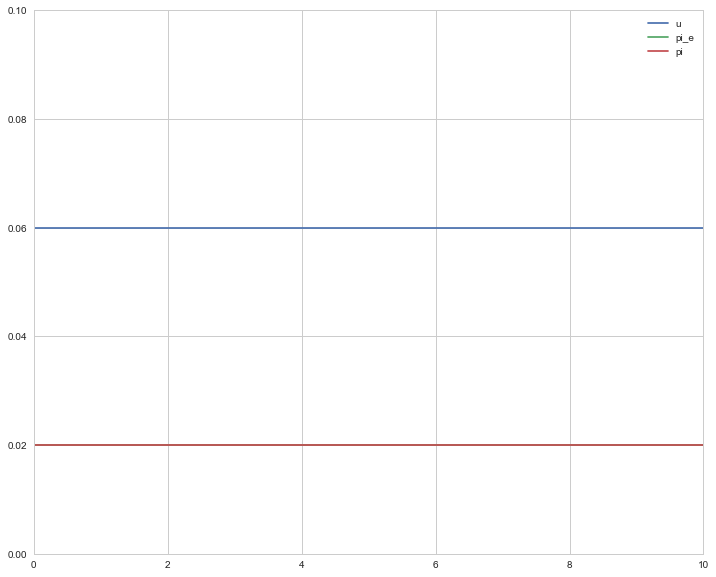

In [25]:
# TASK E INITIALIZATION CHECK ANSWER

static_df = pd.DataFrame({'u' : u,
                          'pi_e' : pie,
                          'pi' : pi},
                         columns = ['u', 'pi_e', 'pi'])

static_df.plot(ylim=(0, 0.1))

### (Task E): Monetary Policy Reactions Under Static Expectations (Initial)

In the code cell below, run the static expectations model for the initial conditions:

* $ u_0 = 0.06 $ (u_0)
* $ {pi^e}_0 = 0.02 $ (pie_0)
* $ pi_0 = 0.06 (pi_0)

I.e., an initial inflation rate in year zero of not 2% per year but rather 6% per year. Stuff the generated inflation rate for the years from zero through year 10 into the series variable static_df.pi

       u  pi_e    pi
0   0.06  0.02  0.02
1   0.06  0.02  0.02
2   0.06  0.02  0.02
3   0.06  0.02  0.02
4   0.06  0.02  0.02
5   0.06  0.02  0.02
6   0.06  0.02  0.02
7   0.06  0.02  0.02
8   0.06  0.02  0.02
9   0.06  0.02  0.02
10  0.06  0.02  0.02


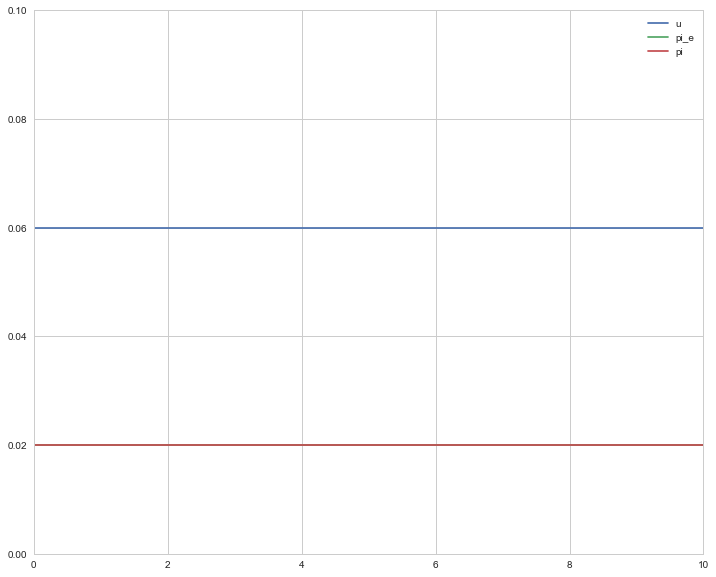

In [26]:
# TASK E CODE

# Initial conditions

# u_0 = 
# pie_0 = 
# pi_0 = 

# Run the model

u = [u_0]
pie = [pie_0]
pi = [pi_0]

for t in range(1,11):
    u = u + [(u_star + phi*r_pi*(pi[t-1]- pi_T) - phi*r_u*((u[t-1] - u_star2))
              + phi*(r_star2-r_star))]
    pie = pie + [pi_star]
    pi = pi + [pie[t] - beta*(u[t]-u_star)]
             
static_df = pd.DataFrame({'u' : u,
                          'pi_e' : pie,
                          'pi' : pi},
                         columns = ['u', 'pi_e', 'pi'])

static_df.plot(ylim=(0., 0.1))
print(static_df)

           u  pi_e        pi
0   0.060000  0.02  0.060000
1   0.080000  0.02  0.010000
2   0.050000  0.02  0.025000
3   0.065000  0.02  0.017500
4   0.057500  0.02  0.021250
5   0.061250  0.02  0.019375
6   0.059375  0.02  0.020313
7   0.060312  0.02  0.019844
8   0.059844  0.02  0.020078
9   0.060078  0.02  0.019961
10  0.059961  0.02  0.020020


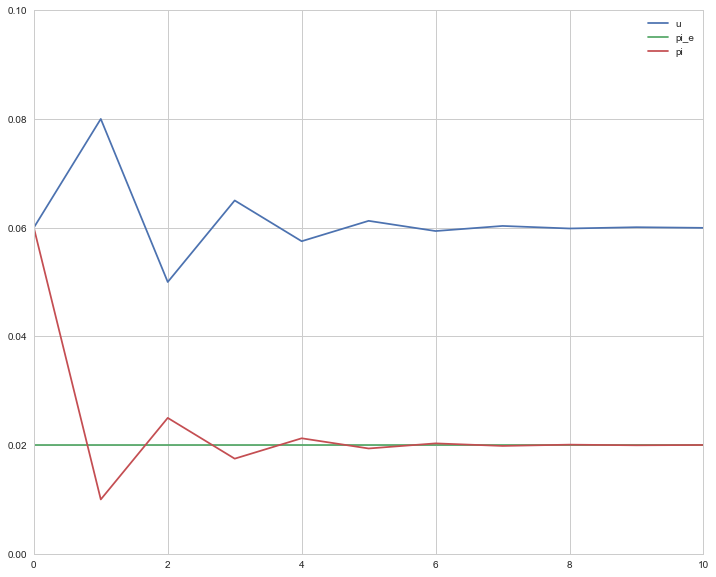

In [27]:
# TASK E CODE ANSWER

u_star = 0.06
phi = 1
pi_T = 0.02
r_star = 0.05
beta = 1/2
pi_star = 0.02
r_pi = 0.5
r_u = 0.25

u_star2 = 0.06
r_star2 = 0.05


# Initial conditions

u_0 = 0.06
pie_0 = 0.02
pi_0 = 0.06


# Run the model

u = [u_0]
pie = [pie_0]
pi = [pi_0]

for t in range(1,11):
    u = u + [(u_star + phi*r_pi*(pi[t-1]- pi_T) - phi*r_u*((u[t-1] - u_star2))
              + phi*(r_star2-r_star))]
    pie = pie + [pi_star]
    pi = pi + [pie[t] - beta*(u[t]-u_star)]
             
static_df = pd.DataFrame({'u' : u,
                          'pi_e' : pie,
                          'pi' : pi},
                         columns = ['u', 'pi_e', 'pi'])

static_df.plot(ylim=(0., 0.1))
print(static_df)

### (Task E): Monetary Policy Reactions Under Static Expectations (Final)

We had the static expectations model with the initial conditions:

* $ u_0 = 0.06 $ :: (u_0)
* $ {\pi^e}_0 = 0.02 $ :: (pie_0)
* $ \pi_0 = 0.06 $ :: (pi_0)

I.e., an initial inflation rate in year zero of not 2% but 6% per year and an initial unemployment rate of 6% per year.

If everything went well, you saw the central bank react to actual inflation at 6% per yar far above its target of 2% by raising interest rates to create excess aggregate supply and push down inflation. Thus year 1 saw inflation below the natural rate and unemployment above its target. The central bank then reacted to that by pushing real interest rates below the neutral rate. Thus year 2 saw inflation above the natural rate and unemployment below the target. These oscillating two year cycles then continued, dampling themselves out quickly.

In [28]:
# TASK E ANSWER CHECK

import numpy as np

ok.grade('q04')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 10
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 10}

### (Task F): Monetary Policy Reactions Under Adaptive Expectations (Initial)

Now let's change gears to adaptive inflation expectations. Our system now is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u_t - u^{*} = {\phi}r_\pi(\pi_{t-1} - \pi^T) - {\phi}r_u(u_{t-1} - u^{**}) + {\phi}(r^{**}-r^*) $ (Monetary Policy Reaction Function)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - u^{*}) $ (Phillips Curve)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {{\pi}_t}^e = {\pi}_{t-1} $ (Adaptive Inflation Expectations)

The code cell below models this system.

In the code cell below, note that the model equation inside the loop for inflation expectations is now:

    pie = pie + [pi[t-1]]
    
That is, each time through the loop the computer adds an additional element to the "pie" list that is the time series of inflation expedtations—the "+" sign here stands for not addition but, rather, concatenation. The t'th element it adds to the expectations list is simply what the t-1'st value of actual inflation was. Under static expectations, this equation for inflation expectations was the static:

    pie = pie + [pi_star]
    
Each time through the loop the computer added an additional element to the "pie" list that is the time series of inflation expedtations. But the value it added was simply the static $ \pi^* $.

In the code cell below, set the initial conditions for unemployment, inflation, and expected inflation in year 0 to 0.06. Run the model. Then stuff the generated inflation rate for the years from zero through year 10 into the series variable adaptive_df.pi

In [29]:
# TASK F CODE

# Initial conditions

u_0 = 
pie_0 = 
pi_0 = 


# Parameters

u_star = 0.06
phi = 1
pi_T = 0.02
r_star = 0.05
beta = 1/2
pi_star = 0.02
r_pi = 0.5
r_u = 0.25

u_star2 = 0.06
r_star2 = 0.05


# Run the model

u = [u_0]
pie = [pie_0]
pi = [pi_0]
      
for t in range(1,11):
    u = u + [(u_star + phi*r_pi*(pi[t-1]- pi_T) - phi*r_u*((u[t-1] - u_star2))
              + phi*(r_star2-r_star))]
    pie = pie + [pi[t-1]]
    pi = pi + [pie[t] - beta*(u[t]-u_star)]

SyntaxError: invalid syntax (<ipython-input-29-da43c924668c>, line 5)

           u      pi_e        pi
0   0.060000  0.060000  0.060000
1   0.080000  0.060000  0.050000
2   0.070000  0.050000  0.045000
3   0.070000  0.045000  0.040000
4   0.067500  0.040000  0.036250
5   0.066250  0.036250  0.033125
6   0.065000  0.033125  0.030625
7   0.064062  0.030625  0.028594
8   0.063281  0.028594  0.026953
9   0.062656  0.026953  0.025625
10  0.062148  0.025625  0.024551


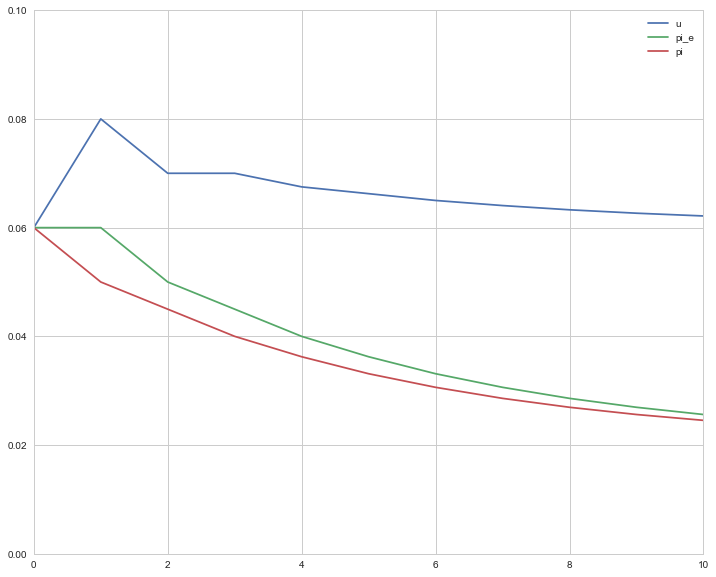

In [30]:
# TASK F CODE ANSWER

u_star = 0.06
phi = 1
pi_T = 0.02
r_star = 0.05
beta = 1/2
pi_star = 0.02
r_pi = 0.5
r_u = 0.25

u_star2 = 0.06
r_star2 = 0.05

u = [0.06]
pie = [0.06]
pi = [0.06]

for t in range(1,11):
    u = u + [(u_star + phi*r_pi*(pi[t-1]- pi_T) - phi*r_u*((u[t-1] - u_star2))
              + phi*(r_star2-r_star))]
    pie = pie + [pi[t-1]]
    pi = pi + [pie[t] - beta*(u[t]-u_star)]
             
adaptive_df = pd.DataFrame({'u' : u,
                          'pi_e' : pie,
                          'pi' : pi},
                         columns = ['u', 'pi_e', 'pi'])

adaptive_df.plot(ylim=(0., 0.1))
print(adaptive_df)

In [31]:
# TASK F ANSWER CHECK

import numpy as np
ok.grade('q05')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 10
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 10}

### (Task F): Monetary Policy Reactions Under Adaptive Expectations (Final)

We had the adaptive expectations model with the initial conditions:

* $ u_0 = 0.06 $ :: (u_0)
* $ {\pi^e}_0 = 0.06 $ :: (pie_0)
* $ \pi_0 = 0.06 $ :: (pi_0)

I.e., an initial inflation rate in year zero of 6% per year and an initial unemployment rate of 2% per year.

If everything went well, you saw the central bank react to actual inflation at 6% per yar far above its target of 2% by raising interest rates to create excess aggregate supply and push down inflation. Because inflation expectations were adaptive, expected inflation fell only gradually, lagging behind the fall in actual inflation. Thus there was a long time period during which interest rates are elevated, unemployment is above its natural rate, and inflation is above its target—albeit falling.

The fear of getting into such a situation, of higher inflation than the desired target and high unemployment, was one of the principal reasons that central banks have been hesitant to try to drive economies rapidly to full employment over the past decade.

### (Task G): Monetary Policy Reactions Under Hybrid Expectations (Initial)

Now let's change gears to hybrid mix of adaptive and perfect-foresight rational inflation expectations. Our system now is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u_t - u^{*} = {\phi}r_\pi(\pi_{t-1} - \pi^T) - {\phi}r_u(u_{t-1} - u^{**}) + {\phi}(r^{**}-r^*) $ (Monetary Policy Reaction Function)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - u^{*}) $ (Phillips Curve)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {{\pi}_t}^e = \lambda{\pi}_t + (1-\lambda){\pi}_{t-1} $ (Hybrid Inflation Expectations)

The code cell below models this system.

In the code cell below, note that the model equation inside the loop for inflation expectations is now:

    pie = pie + [pi[t-1]]/(1-lambda_)
    
That is, each time through the loop the computer adds an additional element to the "pie" list that is the time series of inflation expedtations—the "+" sign here stands for not addition but, rather, concatenation. Under adaptive expectations, this equation for inflation expectations was the adaptive:

    pie = pie + [pi[t-1]]
    
Each time through the loop the computer added an additional element to the "pie" list that is the time series of inflation expedtations. But the value it added was simply the adaptive $ \pi_{t-1} $.

In the code cell below, set the initial conditions for unemployment, inflation, and expected inflation in year 0 to 0.06. Run the model. Then stuff the generated inflation rate for the years from zero through year 10 into the series variable hybrid_df.pi

           u      pi_e        pi
0   0.060000  0.060000  0.060000
1   0.080000  0.030000  0.020000
2   0.055000  0.027500  0.030000
3   0.066250  0.020625  0.017500
4   0.057187  0.021719  0.023125
5   0.062266  0.019727  0.018594
6   0.058730  0.020498  0.021133
7   0.060884  0.019807  0.019365
8   0.059462  0.020173  0.020442
9   0.060356  0.019909  0.019731
10  0.059777  0.020066  0.020178


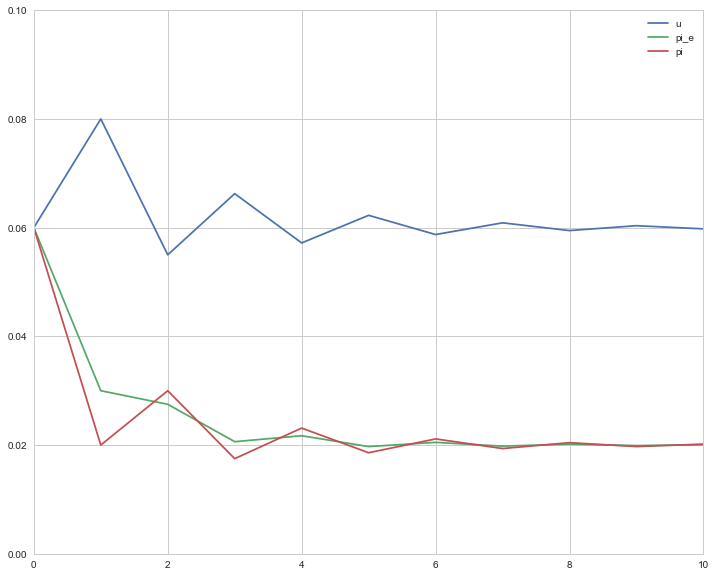

In [32]:
# TASK G CODE ANSWER

u_star = 0.06
phi = 1
pi_T = 0.02
r_star = 0.05
beta = 1/2
pi_star = 0.02
r_pi = 0.5
r_u = 0.25
lambda_ = 0.75

u_star2 = 0.06
r_star2 = 0.05

u = [0.06]
pie = [0.06]
pi = [0.06]

for t in range(1,11):
    u = u + [(u_star + phi*r_pi*(pi[t-1]- pi_T) - phi*r_u*((u[t-1] - u_star2))
              + phi*(r_star2-r_star))]
    pi = pi + [pi[t-1] - beta*(u[t]-u_star)/(1-lambda_)]
    pie = pie + [lambda_*pi[t] + (1-lambda_)*pi[t-1]]
             
hybrid_df = pd.DataFrame({'u' : u,
                          'pi_e' : pie,
                          'pi' : pi},
                         columns = ['u', 'pi_e', 'pi'])

hybrid_df.plot(ylim=(0., 0.1))
print(hybrid_df)

In [33]:
# TASK G ANSWER CHECK

import numpy as np
ok.grade('q06')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 10
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 10}

### (Task G): Monetary Policy Reactions Under Hybrid Expectations (Final)

We had the hybrid expectations model with the initial conditions:

* $ u_0 = 0.06 $ :: (u_0)
* $ {\pi^e}_0 = 0.06 $ :: (pie_0)
* $ \pi_0 = 0.06 $ :: (pi_0)

I.e., an initial inflation rate in year zero of not 6% per year and an initial unemployment rate of 2% per year.

If everything went well, you saw the central bank react to actual inflation at 6% per yar far above its target of 2% by raising interest rates to create excess aggregate supply and push down inflation. Because inflation expectations were a hybrid of backward looking adaptive and forward looking, expected inflation fell rapidly, close to matching the fall in actual inflation. Thus the economy very quickly returned to its desired equilibrium, with unemployment near the NAIRU and inflation close to target.

In [34]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'PS12.ipynb'.
Submit... 100% complete
Submission successful for user: jbdelong@berkeley.edu
URL: https://okpy.org/cal/econ101b/sp18/PS12/submissions/xGKDlP

